## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns


Lab | Random Forests

Apply the Random Forests algorithm but this time only by upscaling the data.
Use Feature Selections that you have learned in class to decide if you want to use all of the features (PCA, etc)
Discuss the output and its impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative? How would you change your algorithm or data in order to maximize the return of the bussiness?

## Get Data

In [2]:
categorical = pd.read_csv('categorical.csv')

In [3]:
numerical = pd.read_csv('numerical.csv')

In [4]:
target = pd.read_csv('target.csv')

In [5]:
data = pd.concat([numerical, categorical, target], axis = 1)

In [6]:
data

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3

In [7]:
data['GENDER'].value_counts(dropna=False)

F        54234
M        39094
other     2084
Name: GENDER, dtype: int64

In [8]:
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [9]:
data.shape

(95412, 339)

In [10]:
data.isna().sum().sum()

0

In [11]:
data.columns

Index(['TCODE', 'AGE', 'INCOME', 'WEALTH1', 'HIT', 'MALEMILI', 'MALEVET',
       'VIETVETS', 'WWIIVETS', 'LOCALGOV',
       ...
       'MINRDATE_YR', 'MINRDATE_MM', 'MAXRDATE_YR', 'MAXRDATE_MM',
       'LASTDATE_YR', 'LASTDATE_MM', 'FIRSTDATE_YR', 'FIRSTDATE_MM',
       'TARGET_B', 'TARGET_D'],
      dtype='object', length=339)

In [12]:
data_num = pd.concat([numerical, target], axis = 1)

In [13]:
data_num.shape

(95412, 317)

In [14]:
data_cat = pd.concat([categorical, target], axis = 1)

In [15]:
data_cat.shape

(95412, 24)

In [16]:
X = pd.concat([numerical,categorical],axis = 1)

In [17]:
y =target['TARGET_B']
target_d = target['TARGET_D']

## Train test split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (66788, 337)
X_test shape:  (28624, 337)
y_train shape:  (66788,)
y_test shape:  (28624,)


In [20]:
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num  = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)

In [21]:
print('X_train_num shape: ', X_train_num.shape)
print('X_test_num shape: ', X_test_num.shape)
print('X_train_cat shape: ', X_train_cat.shape)
print('X_test_cat shape: ', X_test_cat.shape)

X_train_num shape:  (66788, 330)
X_test_num shape:  (28624, 330)
X_train_cat shape:  (66788, 7)
X_test_cat shape:  (28624, 7)


In [22]:
transformer = MinMaxScaler().fit(X_train_num)
X_train_num_norm = transformer.transform(X_train_num)
print(X_train_num_norm.shape)
X_train_num_scale = pd.DataFrame(X_train_num_norm, index = X_train_num.index, columns=X_train_num.columns)
X_train_num_scale.head()
X_train_num_scale.reset_index(drop = True, inplace = True)

(66788, 330)


In [23]:
X_train_num_scale.shape

(66788, 330)

In [24]:
X_test_num_norm = transformer.transform(X_test_num)
print(X_test_num_norm.shape)
X_test_num_scale = pd.DataFrame(X_test_num_norm, index = X_test_num.index, columns=X_test_num.columns)
X_test_num_scale.head()
X_test_num_scale.reset_index(drop = True, inplace=True)
X_test_num_scale

(28624, 330)


,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,0.000014,0.402062,0.833333,1.000000,0.045643,0.000000,0.282828,0.333333,0.191919,0.030303,0.141414,0.050000,1.000000,0.012594,0.014895,0.012767,0.929293,0.000000,0.080808,0.515152,0.494949,0.979798,0.000000,0.010101,0.020202,0.040404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.020619,0.00,0.000000,0.023256,0.4375,0.500000,0.512195,0.435897,0.551282,0.576923,0.373333,0.313131,0.434343,0.262626,0.103093,0.191919,0.323232,0.191919,0.111111,0.060606,0.038462,0.151515,0.101010,0.353535,0.242424,0.161616,0.131313,0.030303,0.121212,0.141414,0.373737,0.494949,0.272727,0.101010,0.020202,0.646465,0.121212,0.044776,0.212121,0.301538,0.391429,0.898990,0.858586,0.020202,0.101010,0.070707,0.060606,0.000000,0.000000,0.0,0.167833,0.187500,0.307692,0.307692,0.858586,0.151515,0.979798,0.030303,0.141414,0.414141,0.787879,0.666667,0.333333,0.878788,0.131313,0.080808,0.04,0.060606,0.131313,0.121212,0.070707,0.293333,0.656566,0.101010,0.000000,0.000000,0.000000,0.050505,0.161616,0.515152,0.848485,0.979798,0.000000,0.010101,0.828283,0.870588,0.800000,0.245902,0.100,0.090909,0.010101,0.000000,0.060606,0.030303,0.060606,0.000000,0.242424,0.313131,0.858586,0.949495,0.115385,0.683564,0.859251,0.282000,0.324000,0.354667,0.386667,0.107533,0.060606,0.121212,0.171717,0.222222,0.242424,0.127273,0.14,0.065574,0.010101,0.050505,0.080808,0.161616,0.252525,0.232323,0.090909,0.14,0.060606,0.010101,0.151515,0.020202,0.686869,0.060606,0.555556,0.454545,0.111111,0.838384,0.111111,0.000000,0.000000,0.0,0.0,0.00,0.020202,0.040404,0.000000,0.010101,0.166667,0.210526,0.000000,0.535354,0.808081,0.858586,0.757576,0.858586,0.696970,0.777778,0.626263,1.000000,1.000000,0.000000,0.191919,0.222222,0.040404,0.111111,0.181818,0.000000,0.018182,0.080808,0.020202,0.080808,0.030303,0.040404,0.000000,0.020202,0.015385,0.101010,0.111111,0.030303,0.078125,0.040404,0.111111,0.101010,0.050505,0.030303,0.016393,0.050505,0.101010,0.090909,0.090909,0.030303,0.141414,0.030303,0.141414,0.575758,0.090909,0.000000,0.905882,0.030303,0.010101,0.151515,0.292929,0.162162,0.343434,0.121212,0.051546,0.303030,0.090909,0.277778,0.

In [25]:
X_test_num_scale.shape

(28624, 330)

In [26]:
# Encode the categorical features using One-Hot Encoding

In [27]:
X_train_cat.dtypes

STATE       object
HOMEOWNR    object
GENDER      object
RFA_2R      object
RFA_2A      object
GEOCODE2    object
DOMAIN_A    object
dtype: object

In [28]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66788 entries, 33476 to 15795
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   STATE     66788 non-null  object
 1   HOMEOWNR  66788 non-null  object
 2   GENDER    66788 non-null  object
 3   RFA_2R    66788 non-null  object
 4   RFA_2A    66788 non-null  object
 5   GEOCODE2  66788 non-null  object
 6   DOMAIN_A  66788 non-null  object
dtypes: object(7)
memory usage: 4.1+ MB


In [29]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat)

cols = encoder.get_feature_names(input_features=X_train_cat.columns)

X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)

X_train_cat_encode.reset_index(drop = True, inplace = True)
X_train_cat_encode

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66784,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
66785,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
66786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [30]:
X_train_cat_encode.shape

(66788, 24)

In [31]:
cols = encoder.get_feature_names(input_features=X_test_cat.columns)

X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)

X_test_cat_encode.reset_index(drop = True, inplace = True)
X_test_cat_encode

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
28620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
28621,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [32]:
X_test_cat_encode.shape

(28624, 24)

In [33]:
X_train = pd.concat([X_train_num_scale,X_train_cat_encode], axis=1)
X_train.index
y_train.reset_index(drop = True, inplace = True)

In [34]:
X_test = pd.concat([X_test_num_scale,X_test_cat_encode], axis=1)
X_test

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.000014,0.402062,0.833333,1.000000,0.045643,0.000000,0.282828,0.333333,0.191919,0.030303,0.141414,0.050000,1.000000,0.012594,0.014895,0.012767,0.929293,0.000000,0.080808,0.515152,0.494949,0.979798,0.000000,0.010101,0.020202,0.040404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.020619,0.00,0.000000,0.023256,0.4375,0.500000,0.512195,0.435897,0.551282,0.576923,0.373333,0.313131,0.434343,0.262626,0.103093,0.191919,0.323232,0.191919,0.111111,0.060606,0.038462,0.151515,0.101010,0.353535,0.242424,0.161616,0.131313,0.030303,0.121212,0.141414,0.373737,0.494949,0.272727,0.101010,0.020202,0.646465,0.121212,0.044776,0.212121,0.301538,0.391429,0.898990,0.858586,0.020202,0.101010,0.070707,0.060606,0.000000,0.000000,0.0,0.167833,0.187500,0.307692,0.307692,0.858586,0.151515,0.979798,0.030303,0.141414,0.414141,0.787879,0.666667,0.333333,0.878788,0.131313,0.080808,0.04,0.060606,0.131313,0.121212,0.070707,0.293333,0.656566,0.101010,0.000000,0.000000,0.000000,0.050505,0.161616,0.515152,0.848485,0.979798,0.000000,0.010101,0.828283,0.870588,0.800000,0.245902,0.100,0.090909,0.010101,0.000000,0.060606,0.030303,0.060606,0.000000,0.242424,0.313131,0.858586,0.949495,0.115385,0.683564,0.859251,0.282000,0.324000,0.354667,0.386667,0.107533,0.060606,0.121212,0.171717,0.222222,0.242424,0.127273,0.14,0.065574,0.010101,0.050505,0.080808,0.161616,0.252525,0.232323,0.090909,0.14,0.060606,0.010101,0.151515,0.020202,0.686869,0.060606,0.555556,0.454545,0.111111,0.838384,0.111111,0.000000,0.000000,0.0,0.0,0.00,0.020202,0.040404,0.000000,0.010101,0.166667,0.210526,0.000000,0.535354,0.808081,0.858586,0.757576,0.858586,0.696970,0.777778,0.626263,1.000000,1.000000,0.000000,0.191919,0.222222,0.040404,0.111111,0.181818,0.000000,0.018182,0.080808,0.020202,0.080808,0.030303,0.040404,0.000000,0.020202,0.015385,0.101010,0.111111,0.030303,0.078125,0.040404,0.111111,0.1010

In [35]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (66788, 354)
X_test shape:  (28624, 354)
y_train shape:  (66788,)
y_test shape:  (28624,)


In [36]:
data = pd.concat([X_train, y_train], axis = 1)
data

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,TARGET_B
0,0.000014,0.546392,1.000000,0.222222,0.016598,0.000000,0.343434,0.232323,0.494949,0.020202,0.000000,0.050000,0.333333,0.010355,0.012413,0.010423,0.0,0.000000,1.000000,0.494949,0.515152,0.979798,0.000000,0.020202,0.010101,0.010101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.000000,0.4625,0.548780,0.573171,0.487179,0.602564,0.641026,0.346667,0.262626,0.434343,0.303030,0.103093,0.151515,0.242424,0.161616,0.171717,0.121212,0.076923,0.101010,0.121212,0.282828,0.292929,0.212121,0.262626,0.080808,0.232323,0.171717,0.363636,0.474747,0.272727,0.141414,0.060606,0.666667,0.080808,0.089552,0.212121,0.295385,0.395714,0.747475,0.737374,0.010101,0.010101,0.000000,0.000000,0.000000,0.000000,0.000000,0.128000,0.137000,0.230769,0.153846,0.787879,0.222222,0.979798,0.030303,0.090909,0.353535,0.808081,0.717172,0.303030,0.898990,0.111111,0.050505,0.02,0.040404,0.101010,0.141414,0.030303,0.240000,0.595960,0.202020,0.000000,0.000000,0.000000,0.010101,0.050505,0.222222,0.525253,0.808081,0.000000,0.030303,0.505051,0.658824,0.622222,0.245902,0.125,0.010101,0.000000,0.242424,0.141414,0.010101,0.000000,0.060606,0.070707,0.121212,0.303030,0.585859,0.256410,0.360983,0.909194,0.169333,0.178000,0.209333,0.230667,0.062061,0.202020,0.282828,0.232323,0.090909,0.141414,0.054545,0.04,0.000000,0.000000,0.131313,0.313131,0.222222,0.111111,0.161616,0.040404,0.04,0.000000,0.000000,0.343434,0.000000,0.404040,0.080808,0.474747,0.535354,0.050505,0.797980,0.090909,0.000000,0.000000,0.000000,0.0,0.00,0.060606,0.060606,0.060606,0.000000,0.188889,0.302632,0.035294,0.565657,0.616162,0.656566,0.575758,0.636364,0.575758,0.696970,0.555556,0.000000,1.000000,0.000000,0.141414,0.030303,0.020202,0.121212,0.080808,0.000000,0.000000,0.121212,0.040404,0.151515,0.050505,0.090909,0.177215,0.080808,0.000000,0.040404,0.171717,0.050505,0.000000,0.101010,0.2121

In [37]:
data.shape

(66788, 355)

In [38]:
data.isna().sum().sum()

0

## Adding in KBest

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

print(X_train.shape)

K_best = SelectKBest(chi2, k=25).fit_transform(X_train, y_train)

print(K_best.shape)
selected = pd.DataFrame(K_best)
selected.head()

(66788, 354)
(66788, 25)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0.000000,0.128000,0.137000,0.000000,0.000000,0.010101,0.050505,0.222222,0.525253,0.000000,0.070707,0.121212,0.316667,0.267016,0.016949,0.111111,0.000000,0.642857,0.0,0.000000,0.0,1.0,0.0,0.0,1.0
1,0.010101,0.230000,0.239333,0.018182,0.010101,0.111111,0.424242,0.767677,0.939394,0.020202,0.757576,0.858586,0.083333,0.041885,0.000000,0.027778,0.000000,0.928571,0.0,0.000000,0.5,0.0,0.0,1.0,0.0
2,0.212121,0.062667,0.075500,0.109091,0.121212,0.010101,0.020202,0.060606,0.131313,0.000000,0.010101,0.020202,0.450000,0.324607,0.097458,0.388889,0.666667,0.285714,0.0,0.909091,0.0,0.0,0.0,0.0,0.0
3,0.010101,0.224167,0.226500,0.000000,0.010101,0.030303,0.292929,0.838384,1.000000,0.000000,0.888889,0.929293,0.483333,0.382199,0.097458,0.361111,0.666667,0.285714,0.0,0.000000,0.5,0.0,0.0,1.0,0.0
4,0.080808,0.117833,0.120333,0.054545,0.050505,0.000000,0.000000,0.010101,0.333333,0.000000,0.454545,0.717172,0.116667,0.089005,0.004237,0.055556,0.000000,0.857143,0.0,0.000000,0.0,0.0,0.0,1.0,0.0


In [40]:
model = SelectKBest(chi2, k=25).fit(X_train,y_train)
df = pd.DataFrame(data = model.scores_, columns=['score'])
df['column_name']= X_train.columns
display(df.shape)
df
df.sort_values(by = ['score'],ascending = False).head(50)

(354, 2)

,score,column_name
313,145.064893,RFA_2F
344,67.435219,RFA_2A_E
346,63.643242,RFA_2A_G
345,33.148930,RFA_2A_F
326,33.036504,LASTDATE_YR
305,21.746048,CARDGIFT
110,19.149527,HVP1
111,17.792848,HVP2
115,16.386960,HVP6
112,15.982457,HVP3


In [41]:
cols = df.sort_values(by = ['score'],ascending = False).head(25)['column_name']
col_list = list(cols)
col_list

['RFA_2F',
 'RFA_2A_E',
 'RFA_2A_G',
 'RFA_2A_F',
 'LASTDATE_YR',
 'CARDGIFT',
 'HVP1',
 'HVP2',
 'HVP6',
 'HVP3',
 'HVP4',
 'ETH2',
 'HOMEOWNR_U',
 'ODATEW_MM',
 'RP1',
 'ODATEW_YR',
 'RP2',
 'ETHC4',
 'HV1',
 'ETHC5',
 'HV2',
 'NGIFTALL',
 'DOB_MM',
 'CARDPROM',
 'NUMPROM']

In [42]:
X_corr_data = data[['RFA_2F',
 'RFA_2A_E',
 'RFA_2A_G',
 'RFA_2A_F',
 'HVP1',
 'HVP2',
 'HVP6',
 'HVP3',
 'HVP4',
 'ETH2',
 'RP1',
 'RP2',
 'HV1',
 'HV2',
 'CARDPROM',
 'STATE_GA',
 'DOMAIN_B',
 'STATE_IN',
 'HVP5',
 'MSA',
 'CONTROLN',
 'INCOME',
 'CLUSTER2',
 'STATE_IL',
 'RP3']]

In [43]:
X_test_all = X_test[['RFA_2F',
 'RFA_2A_E',
 'RFA_2A_G',
 'RFA_2A_F',
 'HVP1',
 'HVP2',
 'HVP6',
 'HVP3',
 'HVP4',
 'ETH2',
 'RP1',
 'RP2',
 'HV1',
 'HV2',
 'CARDPROM',
 'STATE_GA',
 'DOMAIN_B',
 'STATE_IN',
 'HVP5',
 'MSA',
 'CONTROLN',
 'INCOME',
 'CLUSTER2',
 'STATE_IL',
 'RP3']]

In [44]:
X_test_all

,RFA_2F,RFA_2A_E,RFA_2A_G,RFA_2A_F,HVP1,HVP2,HVP6,HVP3,HVP4,ETH2,RP1,RP2,HV1,HV2,CARDPROM,STATE_GA,DOMAIN_B,STATE_IN,HVP5,MSA,CONTROLN,INCOME,CLUSTER2,STATE_IL,RP3
0,0.333333,0.0,1.0,0.0,0.050505,0.161616,0.000000,0.515152,0.848485,0.000000,0.242424,0.313131,0.167833,0.187500,0.116667,0.0,0.000000,0.0,0.979798,0.115385,0.696575,0.833333,0.180328,0.0,0.858586
1,0.666667,1.0,0.0,0.0,0.555556,0.868687,0.050505,0.989899,1.000000,0.020202,0.848485,0.979798,0.344833,0.350000,0.333333,0.0,0.333333,0.0,1.000000,0.478632,0.783313,0.666667,0.327869,0.0,0.989899
2,1.000000,0.0,0.0,0.0,0.252525,0.555556,0.050505,0.858586,0.979798,0.737374,0.000000,0.505051,0.265167,0.284000,0.233333,0.0,0.000000,0.0,1.000000,0.230769,0.352384,1.000000,0.098361,0.0,0.505051
3,0.000000,0.0,0.0,1.0,0.959596,0.979798,0.848485,0.979798,0.989899,0.000000,0.757576,0.868687,0.680833,0.695667,0.200000,0.0,0.000000,0.0,0.989899,0.478632,0.768389,1.000000,0.016393,0.0,0.949495
4,0.666667,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.366667,0.0,0.333333,0.0,0.000000,0.662393,0.707765,0.666667,0.032787,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28619,0.000000,0.0,0.0,1.0,0.010101,0.020202,0.000000,0.161616,0.424242,0.000000,0.131313,0.131313,0.118833,0.126667,0.400000,0.0,0.333333,0.0,0.848485,0.175214,0.301621,0.166667,0.606557,0.0,0.191919
28620,0.000000,0.0,1.0,0.0,0.020202,0.040404,0.000000,0.101010,0.181818,0.414141,0.010101,0.020202,0.077000,0.097167,0.500000,0.0,0.333333,0.0,0.434343,0.000000,0.128829,0.833333,0.868852,0.0,0.121212
28621,0.000000,0.0,1.0,0.0,0.060606,0.121212,0.010101,0.282828,0.464646,0.000000,0.111111,0.383838,0.118833,0.151500,0.150000,0.0,0.333333,0.0,0.808081,0.230769,0.348937,0.500000,0.344262,0.0,0.707071
28622,1.000000,1.0,0.0,0.0,0.000000,0.010101,0.000000,0.040404,0.262626,0.010101,0.202020,0.565657,0.109167,0.111833,0.166667,0.0,0.000000,0.0,0.828283,0.491453,0.668078,0.833333,0.295082,0.0,0.919192


## Looking at multicolinearity

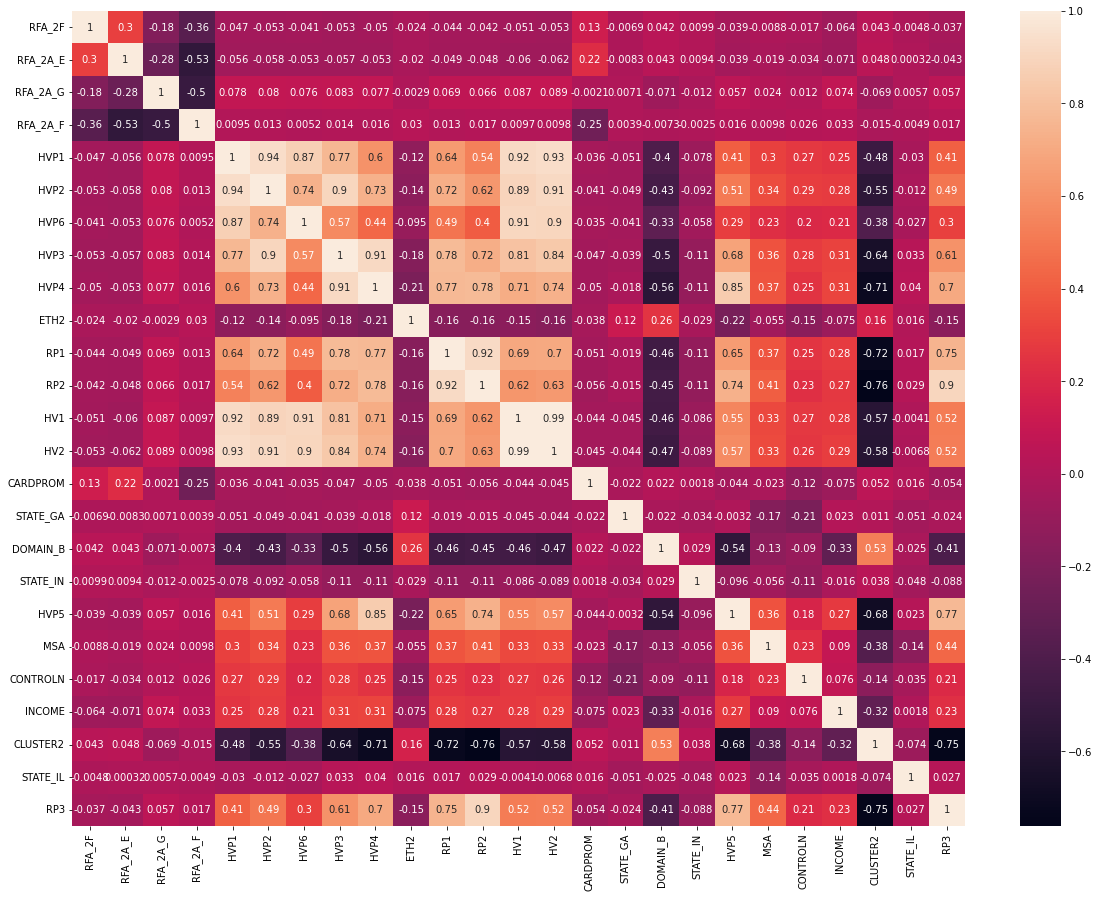

In [45]:
corr_matrix = X_corr_data.corr(method = 'pearson')
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr_matrix, annot = True)
plt.show()

## Plots to look at best multi-collinearity.

In [46]:
col_viz = ['HVP1','HVP2','HVP3','HVP4','HVP5','HVP6','HV1','HV2']

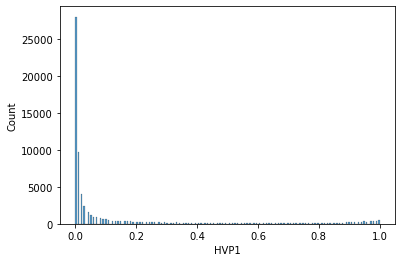

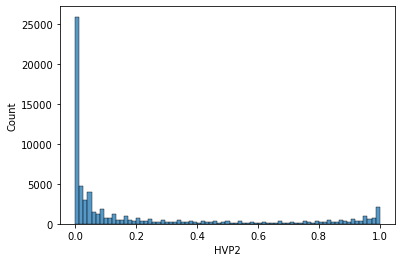

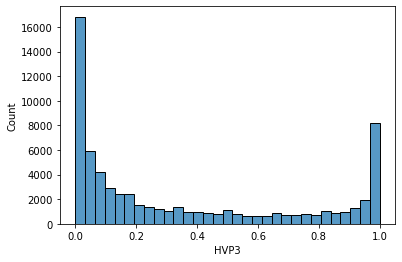

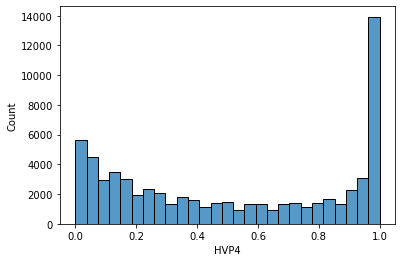

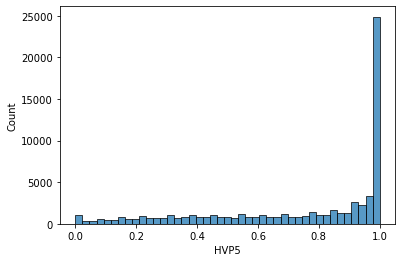

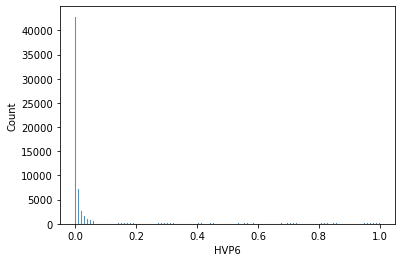

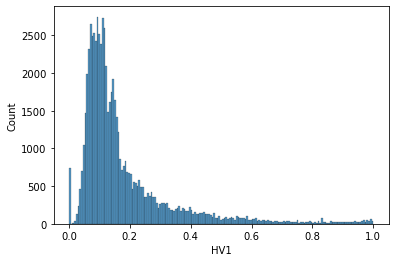

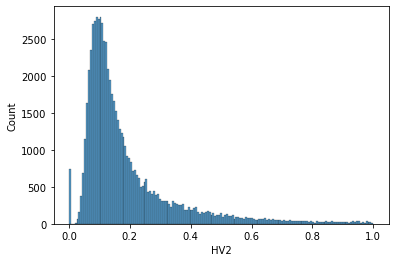

In [47]:
for column in X_corr_data[col_viz]:
    sns.histplot( x=X_corr_data[column])
    plt.show()

In [48]:
col_to_drop = ['HVP1','HVP2','HVP3','HVP5','HVP6','HV2']
# HVP4 I will keep as it has high correlation with the target column.  Maybe look at correlation with Target D

In [49]:
X_train = X_corr_data.drop(['HVP1','HVP2','HVP3','HVP5','HVP6','HV2'], axis = 1)
X_train.shape
X_test = X_test_all.drop(['HVP1','HVP2','HVP3','HVP5','HVP6','HV2'], axis = 1)
X_test

,RFA_2F,RFA_2A_E,RFA_2A_G,RFA_2A_F,HVP4,ETH2,RP1,RP2,HV1,CARDPROM,STATE_GA,DOMAIN_B,STATE_IN,MSA,CONTROLN,INCOME,CLUSTER2,STATE_IL,RP3
0,0.333333,0.0,1.0,0.0,0.848485,0.000000,0.242424,0.313131,0.167833,0.116667,0.0,0.000000,0.0,0.115385,0.696575,0.833333,0.180328,0.0,0.858586
1,0.666667,1.0,0.0,0.0,1.000000,0.020202,0.848485,0.979798,0.344833,0.333333,0.0,0.333333,0.0,0.478632,0.783313,0.666667,0.327869,0.0,0.989899
2,1.000000,0.0,0.0,0.0,0.979798,0.737374,0.000000,0.505051,0.265167,0.233333,0.0,0.000000,0.0,0.230769,0.352384,1.000000,0.098361,0.0,0.505051
3,0.000000,0.0,0.0,1.0,0.989899,0.000000,0.757576,0.868687,0.680833,0.200000,0.0,0.000000,0.0,0.478632,0.768389,1.000000,0.016393,0.0,0.949495
4,0.666667,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.366667,0.0,0.333333,0.0,0.662393,0.707765,0.666667,0.032787,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28619,0.000000,0.0,0.0,1.0,0.424242,0.000000,0.131313,0.131313,0.118833,0.400000,0.0,0.333333,0.0,0.175214,0.301621,0.166667,0.606557,0.0,0.191919
28620,0.000000,0.0,1.0,0.0,0.181818,0.414141,0.010101,0.020202,0.077000,0.500000,0.0,0.333333,0.0,0.000000,0.128829,0.833333,0.868852,0.0,0.121212
28621,0.000000,0.0,1.0,0.0,0.464646,0.000000,0.111111,0.383838,0.118833,0.150000,0.0,0.333333,0.0,0.230769,0.348937,0.500000,0.344262,0.0,0.707071
28622,1.000000,1.0,0.0,0.0,0.262626,0.010101,0.202020,0.565657,0.109167,0.166667,0.0,0.000000,0.0,0.491453,0.668078,0.833333,0.295082,0.0,0.919192


In [50]:
X_train.columns

Index(['RFA_2F', 'RFA_2A_E', 'RFA_2A_G', 'RFA_2A_F', 'HVP4', 'ETH2', 'RP1',
       'RP2', 'HV1', 'CARDPROM', 'STATE_GA', 'DOMAIN_B', 'STATE_IN', 'MSA',
       'CONTROLN', 'INCOME', 'CLUSTER2', 'STATE_IL', 'RP3'],
      dtype='object')

In [51]:
X_test.columns

Index(['RFA_2F', 'RFA_2A_E', 'RFA_2A_G', 'RFA_2A_F', 'HVP4', 'ETH2', 'RP1',
       'RP2', 'HV1', 'CARDPROM', 'STATE_GA', 'DOMAIN_B', 'STATE_IN', 'MSA',
       'CONTROLN', 'INCOME', 'CLUSTER2', 'STATE_IL', 'RP3'],
      dtype='object')

## Let's run a model with the chosen features.

In [52]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
clf.fit(X_train, y_train)
print('TrainSet = ',clf.score(X_train, y_train))
print('TestSet = ',clf.score(X_test, y_test))

TrainSet =  0.9488081691321795
TestSet =  0.9502515371716043


In [53]:
y_train.value_counts()
# imbalanced

0    63369
1     3419
Name: TARGET_B, dtype: int64

In [54]:
for_over_sample = pd.concat([X_train,y_train], axis=1)

In [55]:
for_over_sample.shape


(66788, 20)

## Fixing imbalance

In [56]:
#balacning data - upsampling
no_donate = for_over_sample[for_over_sample['TARGET_B']==0]
yes_donate = for_over_sample[for_over_sample['TARGET_B']==1]

from sklearn.utils import resample
yes_donate_oversampled = resample(yes_donate, 
                                    replace=True,
                                    n_samples = len(no_donate),
                                    random_state=42)


display(no_donate.shape)
display(yes_donate_oversampled.shape)

(63369, 20)

(63369, 20)

In [57]:
oversampled_target = pd.concat([no_donate,yes_donate_oversampled], axis = 0)

# scrambled rows to avoid yes/no clusters
oversampled_total = oversampled_target.sample(frac=1)

X_train_oversampled = oversampled_total.drop(['TARGET_B'], axis = 1)

y_train_oversampled =oversampled_total['TARGET_B']

In [58]:
display(X_train_oversampled.shape)
display(y_train_oversampled.shape)

(126738, 19)

(126738,)

In [59]:
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
clf.fit(X_train_oversampled, y_train_oversampled)
print('TrainSet = ',clf.score(X_train_oversampled, y_train_oversampled))
print('TestSet = ',clf.score(X_test, y_test))

TrainSet =  0.609264782464612
TestSet =  0.6011389044158748


In [60]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(clf, X_train_oversampled, y_train_oversampled, cv=10)
print(np.mean(cross_val_scores))
print(cross_val_scores)


0.6059822882924127
[0.61085687 0.61022566 0.60501815 0.60714849 0.60659618 0.60998895
 0.6076219  0.60714849 0.59867435 0.59654383]


In [61]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [62]:

pred_RF = clf.predict(X_test)

print('accuracy:', accuracy_score(y_test, pred_RF))
print("precision: ",precision_score(y_test,pred_RF))
print("recall: ",recall_score(y_test,pred_RF))
print("f1: ",f1_score(y_test,pred_RF))

accuracy: 0.6011389044158748
precision:  0.06923010604362445
recall:  0.5639044943820225
f1:  0.12332027950549028


/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


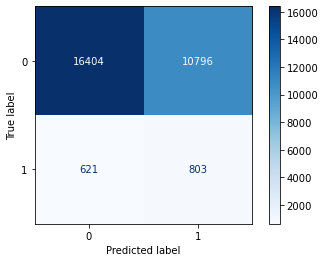

In [63]:
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

In [64]:
round(target['TARGET_D'].mean(),2)

0.79

In [ ]:
donation_gained = 811 * 0.79
donation_lost = 10,808 * 0.79
unexpected_donation = 613 * 0.79
spend_marketing = (10,808+811) * 0.79
no_return_marketing = 10,808 * 0.79

print('Donation amount gained:',round(donation_gained,2))
print('Donation amount lost:',round(donation_lost,2))
print('Unexpected Donations:',round(unexpected_donation,2))
print('Amount spend on marketing:',round(spend_marketing,2))
print('Amount lost on marketing:',round(no_return_marketing,2))

In the above plot we can see that there are 7,524 people of whom the model predicts they won't donate, when they actually would donate, AKA falsely predicted non-donators. There are also 7,533 people of whom the model predicts they will donate, when they actually don't. When we look at the average donation amount of someone who actually donates this lays around 15.62 dollars. It also becomes clear in the calculations above, we can see that with the current model we miss out on 117,665 dollars of donations by not sending marketing efforts to these 7524 falsely predicted non-donators. This is a huge amount when you see that we only raise 178,117 dollars with this model. 

Zooming in on the costs to send the marketing packages: in this scenario we spend a total of 14,962 dollars on marketing. Of which 5,951 dollars does not yield any donation. When we compare this with the 117,665 dollars we are missing out on by not sending them anything. 

We can clearly conclude that it's in the best interest of Healthcare 4 All to have a model in which we have the lowest amount of falsely predicted non-donators. With this model we can see that the donation amount lost is almost equal to the Unexpected Donations gained.This model would need to be imroved to optimize for the Falsely Predicted non- donators who would actually donate.

## RFE option, not used.

In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier
# # define the method
# rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=30)
# # fit the model
# rfe.fit(X_train, y_train)
# # transform the data
# X, y = rfe.transform(X_train, y_train)

In [ ]:
# feature selection

In [ ]:
# donations_data_cat = data_cat[data_cat['TARGET_B']==1] # data of people who have made donation
# donations_data_cat

In [ ]:
# donations_data_cat = donations_data_cat.drop(columns=['TARGET_B','TARGET_D'])
# donations_data_cat

In [ ]:
# donations_data = data_num[data_num['TARGET_B']==1] # data of people who have made donation
# donations_data

In [ ]:
# donations_data.shape

In [ ]:
# X = donations_data.drop(columns=['TARGET_B','TARGET_D']) # we split that into X (features of people who made donation) and y (target).


In [ ]:
# y = donations_data['TARGET_D']
# y.shape

In [ ]:
# X_added_constant = sm.add_constant(X)
# X_added_constant
# model = sm.OLS(y,X_added_constant).fit() # linear regression model but sm.OLS: ordinary least squares. same mathematical method
# model.summary() # OLS does require an additonal feature column. constant column that has a value of 1


In [ ]:
# cols_keep = model.pvalues[model.pvalues <= 0.05]

In [ ]:
# cols_drop = []

In [ ]:
# for i in X:
#     if model.pvalues[i] > 0.05:
#         cols_drop.append(i)
        

In [ ]:
# cols_drop

In [ ]:
# X = X.drop(columns=cols_drop)

In [ ]:
# X.isna().sum().sum()

In [ ]:
# X.columns

In [ ]:
# X.shape

In [ ]:
# categorical.shape

In [ ]:
# X = pd.concat([X, donations_data_cat], axis = 1)

In [ ]:
# X.shape